# Final Project: A Comprehensive Analysis of Economic Wellbeing
## By Robert Hyland

The primary goal of this project was to explore non-traditional measures of economic progress and prosperity. In my studies as a combined Economics Major, economic analysis was typically confined to the typical measures of gross domestic product, inflation, current account balances, and more. While these each provide an important component of understanding a country's economy, they fail to take into account non-monetary and more abstract notions of wellbeing. 

The data used in this project combines the traditional measures, such as GDP and inflation, with more recently incorporated economic measures. For example, the Gini coefficient is a measurement of inequality on a 0 to 1 scale. The closer to 1, the more economically unequal a country is, and the closer to zero, the closer a country is to perfect inequality. Taken in consideration with measures such as poverty rates, CO2 emissions, and others, my goal is to get a better understanding of how economic inequality presents itself in countries around the world. 

In the cell below, I've imported both the pandas library and two files I will be using in dataframe format. Both datasets are CSV files from the World Bank's online database, and can be found [here](https://databank.worldbank.org/home.aspx). The first dataframe, referred to as "df", is a massive compendium of economic data for each country, sorted by year from 2000 to 2020. Some of the data relates to GDP, HIV prevalence, school completion, etc. For ease in calling each column name, I renamed the columns to strings of characters without spaces. Additionally, I removed some of the bottom rows, as they were either blank or related to data not needed for this analysis. As a note, there are several points in the dataframe where ".." is used to indicate a lack of data for that metric and year. As there are other measurements in these rows that are important for my analysis, I refrained from dropping those rows entirely, and instead opted to incorporate boolean statements into my column calls later in the functions. 

The second dataframe, ginidf, is specifically for the recorded Gini coefficients for each available year, by country. There was a blank column, which i used df.drop to remove. The ginidf was then sorted by year, and I dropped any columns that were referencing measures that were not the Gini coefficient. 

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
df = pd.read_csv('popularindicators.csv')
df = df[:4557]
df.columns = ['time', 'time_code', 'country_name', 'country_code', 'population', 'poverty_prcnt', 
              'bottomtwentyincomeshare', 'life_expectancy', 'fertility_rate', 'infantmortalityper1000', 
              'primaryschoolprcnt', 'secondaryenroll', 'primaryandsecondaryenroll', 'HIVprev', 
              'CO2emissionspercapita', 'electricconsumption_kWh', 'GDP', 'GDPpercapita', 'inflation', 'gini']

ginidf = pd.read_csv('ginis.csv')
ginidf = ginidf.sort_values(by = 'TIME')
ginidf = ginidf[(ginidf.SUBJECT == 'GINI')]
ginidf = ginidf.drop(['Flag Codes', 'INDICATOR'], axis=1)
df


,time,time_code,country_name,country_code,population,poverty_prcnt,bottomtwentyincomeshare,life_expectancy,fertility_rate,infantmortalityper1000,primaryschoolprcnt,secondaryenroll,primaryandsecondaryenroll,HIVprev,CO2emissionspercapita,electricconsumption_kWh,GDP,GDPpercapita,inflation,gini
0,2000,YR2000,Afghanistan,AFG,20779953,..,..,55.841,7.485,128.7,..,..,..,0.1,0.0372347810411313,..,..,..,..,..
1,2000,YR2000,Albania,ALB,3089027,..,..,73.955,2.157,27.2,96.5826873779297,71.0780792236328,0.976209998130798,0.1,0.978174680894664,1449.64741324695,3480355188.60063,1126.68331762741,0.0500181363468265,..
2,2000,YR2000,Algeria,DZA,31042235,..,..,70.64,2.514,39.7,80.166389465332,65.1169815063477,0.964209973812103,0.1,2.83037996458696,683.294872292539,54788732394.3662,1764.97382982785,0.339163189071755,..
3,2000,YR2000,American Samoa,ASM,57821,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4,2000,YR2000,Andorra,AND,65390,..,..,..,..,7.7,..,..,..,..,8.01928429423459,..,1429049198.45218,21854.2468030614,..,..
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4552,2020,YR2020,Virgin Islands (U.S.),VIR,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4553,2020,YR2020,West Bank and Gaza,PSE,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4554,2020,YR2020,"Yemen, Rep.",YEM,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..
4555,2020,YR2020,Zambia,ZMB,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..,..


In [11]:
# this is a LOT of data that doesn't exactly tell us much. get_info() is a brief data summary! 

def get_info(country, year):
    tempdf = df[(df.time == year) & (df.country_name == country)]
    tempdf[tempdf.country_name == country].GDP
    print(f'Report generated for {country} in the year {year}')
    if tempdf.GDP.tolist()[0] == '..':
        print('GDP: Data unavailable for this year')
    else:
        print('GDP (Current USD):', tempdf['GDP'].tolist()[0])
    if tempdf.population.tolist()[0] == '..':
        print('Population: Data unavailable')
    else:
        print('Population:', tempdf.population.tolist()[0])
    if tempdf.life_expectancy.tolist()[0] == '..':
        print('Life expectancy: Data Unavailable')
    else:
        print('Life expectancy:', tempdf.life_expectancy.tolist()[0])
    if tempdf.poverty_prcnt.tolist()[0] == '..':
        print('Percentage of people living in poverty: Data unavailable')
    else: 
        print('Percentage of people living in poverty:', tempdf.poverty_prcnt.tolist()[0])
    if tempdf.infantmortalityper1000.tolist()[0] == '..':
        print('Child deaths per 1000 births: Data Unavailable')
    else: 
        print('Child deaths per 1000 births:', tempdf.infantmortalityper1000.tolist()[0])



In [12]:
get_info('Zimbabwe', '2015')

Report generated for Zimbabwe in the year 2015
GDP (Current USD): 19963120600
Population: 13814629
Life expectancy: 59.534
Percentage of people living in poverty: Data unavailable
Child deaths per 1000 births: 62


## Functions Two and Three: current_gini_info() and gdp_gini_comp()

The next two functions also work to make the above data more understandable. The function current_gini_info() takes a country code (a three-letter designation for each country, typically an abbreviation) and returns the most recent value for the Gini coefficient. Then, using the Gini values for the country in list format, it takes the two most recent values for the Gini coefficient and compares them. If the Gini is trending downward, the function states that the country is beocming more equal, and the opposite if the Gini is trending upward. 

The function gdp_gini_comp() also takes a country code, but uses both dataframes from above to get lists of both GDP and the Gini coefficient by year. Using "df" from above, a temporary dataframe is created where there are no blank GDP values, and only the specified country code is represented. The ginidf is then used to create a temporary dataframe, again where only the specified country code is represented. From these two temporary dataframes, two sets of years and values are created, and plotted on the same graph.

As the GDP and Gini coefficient use vastly different scales, I had to look up how to add a second y-axis scale to my plot. Using twinx() to use the same x axis for both figures on the same plot, I was able to create two separate y axes. Any information I used to figure out how to add a second y-axis can be found on the [matplotlib website](https://matplotlib.org/gallery/api/two_scales.html) or [here](https://cmdlinetips.com/2019/10/how-to-make-a-plot-with-two-different-y-axis-in-python-with-matplotlib/). As both functions use country codes as arguments, I was able to incorporate current_gini_info into the gdp_gini_comp() function. Not only does it produce a graph, it now also yields the values returned by the current_gini_info function. 

In [29]:
def current_gini_info(countrycode):
    tempdf = ginidf[ginidf.LOCATION == countrycode]
    ginis = tempdf.Value.tolist()
    mostrecentgini = ginis[-1]
    yearbeforegini = ginis[-2]
    print(f'The most recent value for {countrycode} is {mostrecentgini}')
    if mostrecentgini > yearbeforegini:
        print('According to the Gini coefficient, this country is becoming more UNEQUAL.')
    if mostrecentgini < yearbeforegini:
        print('According to the Gini coefficient, this country is becoming more EQUAL.')
    if mostrecentgini == yearbeforegini:
        print('According to the Gini coefficient, this country is maintaining a constant level of economic inequality.')

def gdp_gini_comp(countrycode):
    gdpdf = df[(df.GDP != '..') & (df.country_code == countrycode)]
    ginitempdf = ginidf[(ginidf.LOCATION == countrycode) & (ginidf.TIME >= 2000)]
    gdpvals = gdpdf['GDP'].astype('float')
    gdptimes = gdpdf['time'].astype('int')
    ginivals = ginitempdf['Value'].astype('float')
    ginitimes = ginitempdf['TIME'].astype('int')
    countryname = gdpdf.country_name.tolist()[0]
    fig,ax = plt.subplots(figsize=(10, 8))
    ax.plot(gdptimes, gdpvals, label='GDP')
    ax.set_xlabel('Year')
    ax.set_ylabel('GDP in current USD')
    ax2 = ax.twinx()
    ax2.plot(ginitimes, ginivals, color='green', label='Gini Coefficient')
    ax2.set_ylabel('Gini Coefficient')
    plt.title(f'Comparing GDP and Gini coefficient for {countryname}', fontsize = 15)
    fig.legend()
    plt.show()
    current_gini_info(countrycode)
   


current_gini_info('CAN')

The most recent value for CAN is 0.31
According to the Gini coefficient, this country is becoming more UNEQUAL.


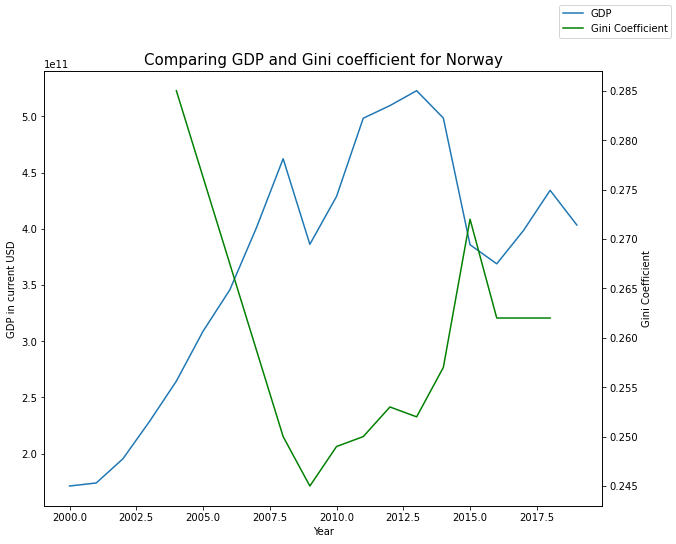

The most recent value for NOR is 0.262
According to the Gini coefficient, this country is maintaining a constant level of economic inequality.


In [30]:
gdp_gini_comp('NOR')

## Function Four: scatter()

This function gives a comprehensive look at various measures of both economic wellbeing and demographics. Given two variables, one for the x axis and one for the y axis, a year, and a variable for determining the color of the points, the function generates a scatterplot that seeks to identify a relationship (or lack thereof) between the two variables. 

The title_dict dictionary is used to generate the title for the plot. Given the column names inputted for the x and y axes, the function uses the title_dict to generate a formatted string. For example, rather than saying "poverty_prcnt", the plot title will then use the title_dict to get the more formal presentation of that variable, "Percentage of People Living in Poverty." 

The function generates a temporary dataframe, where any instances of '..' in any of the needed columns are filtered out. The columns that hold the x and y values in the temporary dataframe are then converted to floats, so as to make plotting the points easier. Using plt.scatter(), the x values and y values are plotted, with size corresponding to population, and color corresponding to the selected variable. Most of the variables can be plotted linearly, but in the event that population or GDP are used for the x axis, the scale is automatically changed to logarithmic. 

In [17]:
title_dict = {'time': 'Year', 'population': 'Population', 'poverty_prcnt': 'Percentage of People Living in Poverty', 
             'bottomtwentyincomeshare': 'Percentage of Income Earned by Bottom 20%', 'life_expectancy': 'Life Expectancy', 
             'fertility_rate': 'Fertility Rate', 'infantmortalityper1000': 'Child Mortality Rate, Per 1000 Live Births', 
             'primaryschoolprcnt': 'Primary School Completion Rate', 'secondaryenroll': 'Secondary School Enrollment Rate',
             'primaryandsecondaryenroll': 'School Enrollment Rate', 'HIVprev': 'HIV Prevalence Rate, 15-49', 'CO2emissionspercapita':
             'CO2 Emissions Per Capita, (metric tons)', 'electricconsumption_kWh': 'Electricity Consumption, kWh per capita', 'GDP': 'GDP in current USD',
             'GDPpercapita': 'GDP per capita, current USD', 'inflation': 'Inflation (annual %)', 'gini': 'Gini Coefficient'}

def scatter(xaxis, yaxis, year, color):
    tempdf = df[(df[xaxis] != '..') & (df[yaxis] != '..') & (df[color] != '..') & (df.time == year)
               & (df.population != '..')]
    xvalues = tempdf[xaxis].astype('float')
    yvalues = tempdf[yaxis].astype('float')
    set_color = tempdf[color].astype('float')
    population = tempdf.population.astype('float')
    plt.figure(figsize=(10, 10), dpi=100)
    plt.scatter(xvalues, yvalues, c=set_color, s=(population/100000))
    plt.xlabel(title_dict[xaxis])
    if xaxis == 'GDP':
        plt.xscale('log')
    elif xaxis == 'population':
        plt.xscale('log')
    plt.ylabel(title_dict[yaxis])
    plt.title(f'{title_dict[yaxis]} vs. {title_dict[xaxis]}')
    plt.show()
    
    

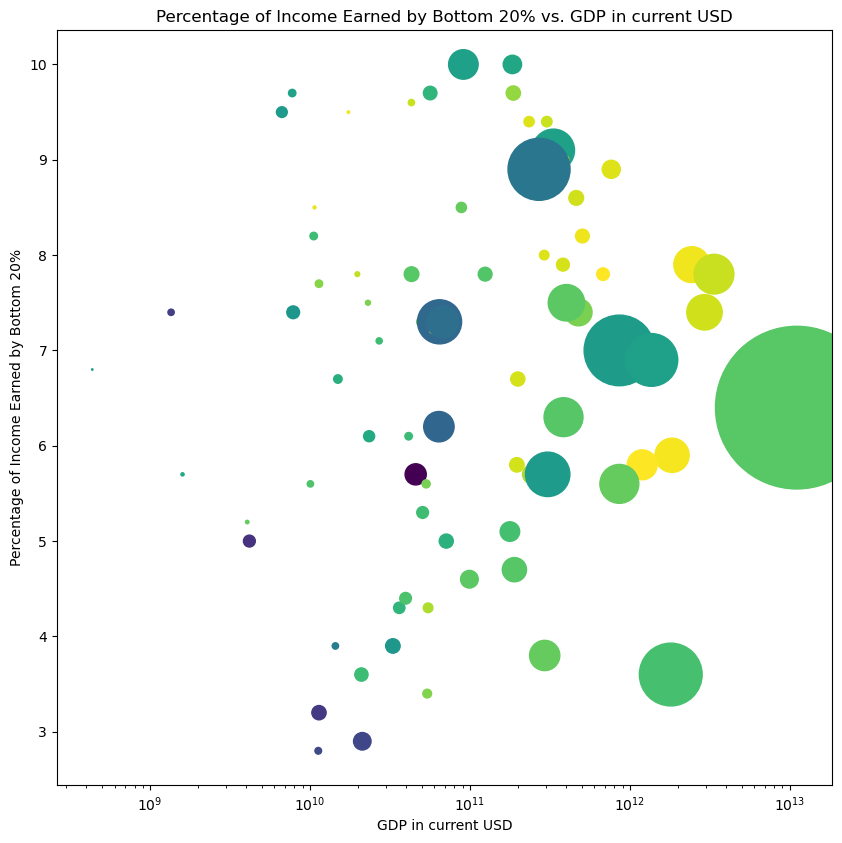

In [21]:
scatter('GDP', 'bottomtwentyincomeshare', '2015', 'life_expectancy')

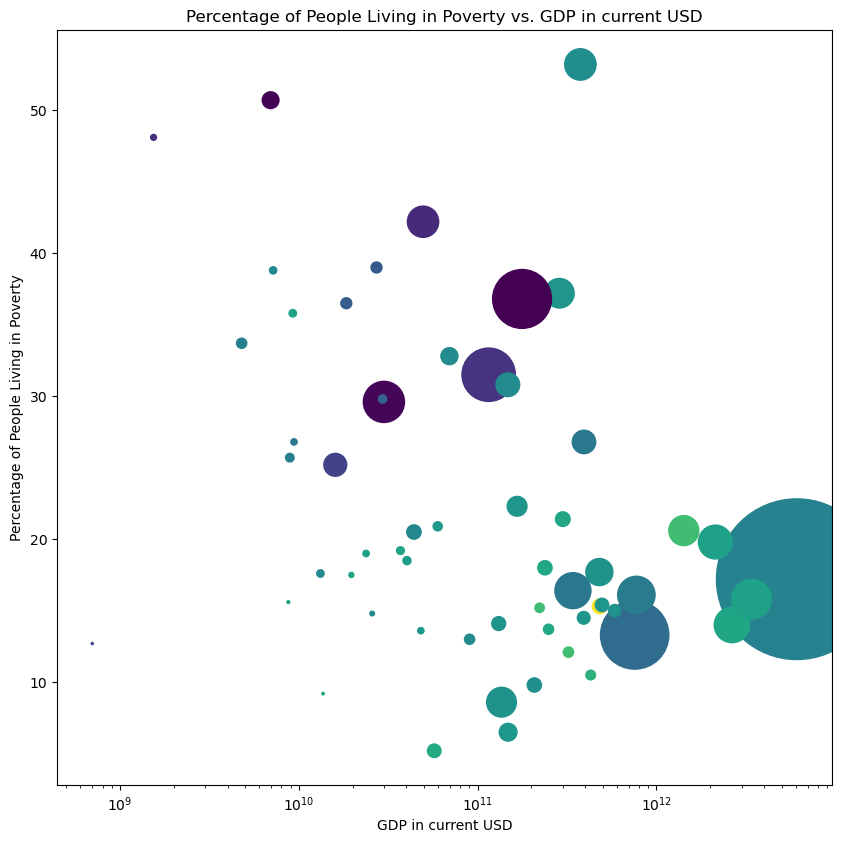

In [20]:
scatter('GDP', 'poverty_prcnt', '2010', 'secondaryenroll')